<img src ="img/biopython_logo_white.png" width = 10%>

# [Biopython](https://biopython.org) 
1. [Instalación](https://anaconda.org/)
2. Manejo de archivos de secuenciación
3. Estadística descriptiva y graficado de datos de las secuencias
4. Manejo de archivos con formato fasta y GenBank
5. Ejercicios con secuencias y datos tabulares
6. Archivos fastq
7. Descripción de las secuencias (tamaño y composición)


### 1. [Instalación](https://anaconda.org/)
    1. Windows `conda install -c conda-forge biopython`
    2. Bioconda `conda install -c bioconda biopython`
    3. Desde el navegador de anaconda

Se cargan los paquetes para el manejo de las secuencias

In [1]:
from Bio import SeqIO
from pandas import DataFrame
import pandas as pd
from Bio.SeqUtils import GC
import pylab as pl
from pylab import *

# Descripcion del ensamblaje de novo obtenido con el programa _Soapdenovo_
Los resultados están en:

In [5]:
cd ~/Desktop/bioinformatica_anotacion2019/data/sec_masiva/fastqc/output_directory/

/Users/migueldelrio/Desktop/bioinformatica_anotacion2019/data/sec_masiva/fastqc/output_directory


## El archivo a analizar es:

In [8]:
ls *.contig

output31.contig


In [9]:
# Funcion para determinar el grado de CpG que son regiones asociadas con la presencia de proteínas
def cpg(secuencia):
    g= secuencia.count("G")
    c= secuencia.count("C")
    cg= secuencia.count("CG")
    lar= len(secuencia)
    cpG=0
    try:
        g*c==0
    except:
        cpG=0
    else:
        if g == 0 or c== 0:
            cpG =0
        else:
            cpG=(round(cg/(g*c)*(lar**2/(lar-1)) ,8))
    return (cpG)

### Manejo de archivos fasta

In [ ]:
#cd ~/Desktop/data/fasta

In [ ]:
f = open('output31.contig', 'r')
for rec in SeqIO.parse(f, "fasta"):
    print(rec.id, rec.description, rec.seq[:20])


In [ ]:
# para imprimir el número de las secuencias

In [ ]:
n=0
f = open('output31.contig', 'r')
for rec in SeqIO.parse(f, "fasta"):
    n+=1
    print(n,rec.id, rec.description, rec.seq[:20])


#### Modifique la siguiente celda para que solo muestre los 10 primeros datos

In [13]:
n=0
f = open('output31.contig', 'r')
for rec in SeqIO.parse(f, "fasta"):
    print(rec.id, rec.description, rec.seq[:20])
    n+=1
    if n==10:
        break

1 1 length 32 cvg_0.0_tip_0 AAAAAAGTACAGGCTCTGAA
3 3 length 32 cvg_0.0_tip_0 AAAAATTAGAAACATCCTTT
5 5 length 32 cvg_0.0_tip_0 AAAACACACACACACACACA
7 7 length 32 cvg_0.0_tip_0 AAAAGCTAATTCATGCATTT
9 9 length 32 cvg_0.0_tip_0 AAAAGGGAGTTTTTCCTTCC
11 11 length 32 cvg_0.0_tip_0 AAACACACACACACACACAC
13 13 length 32 cvg_0.0_tip_0 AAACCAAGCACCTAGGCATG
15 15 length 32 cvg_0.0_tip_0 AAACTCCATTCAAACTGCTT
17 17 length 32 cvg_0.0_tip_0 AAACTGCTTCCAAACATGAT
19 19 length 32 cvg_0.0_tip_0 AAAGCTCAAAAATCACATAA


#### Modifique la siguiente celda para que solo el identificador de los 10 primeros datos

In [ ]:
f = open('contigs.fa', 'r')
for rec in SeqIO.parse(f, "fasta"):
    print(rec.id, rec.description, rec.seq[:20])


### Describa su experiencia

### Para localizar una secuencia en particular se puede utilizar:
P.e. buscar la secuencia "NODE_302_length_229_cov_1.816594" y que despliegue toda la secuencias

In [15]:
f = open('output31.contig', 'r')
for rec in SeqIO.parse(f, "fasta"):
    if rec.id == "17933":
        print(rec.id, rec.description, rec.seq)


17933 17933 length 660 cvg_1.0_tip_1 CCTTCTCCCATATGCTCTTCCAGTATTGCTCTGTCTCCAGCCTTGGTGGGGGTGCTATTTTCATATTGTTCCCCTGCCACTGAGAGTATACCTTGGATGGTTCGGTGGAGAACATCCGGTTTATTTTCCTGGCTTCTATCTCTCTGGTATCCCTCTTCAGGCGGTTAGCCAAGGCTGTAAGCCTTTGCTTGGCAGTCTCTAAGGCCTCAGGTATAGACAGCCCGTTGTACTTCTTAGGCACTGCTTTCTTCTTCATCCCACGTTTCTGCAACTCTGAGAGCTGGCTAACTTCCCTCCGTGCTGCCTTGATCTTAGCCTCTAATCGTCGTTTCCATGGAGGGTACTGCTCCTTAGTGCTGTTCATCTTATAGCCAAGCATCTCGAGGATCACTGCTGCCGTGTTATACATCAACTGATTGGTTTCAGTGATGGTACTGGTAGGGATTGTCCGTAGTGCTGCATTCGCATCTTCCAGTAGATCTTCAGAGAGTACTTCACACCTTGGTAGTCGGCGTCGAGGGGTCCAGTTTGCCTTCTTAGCCATGATCTTATCTTTCAGGTCAGCTGCTCTGCTATTTAGTGTACTTGTTTGTGGTAGTGGGCTTGGTACACAATCTCGGAGTGTGGGGATGATGAAATATCCCCCCTGACCTGTCGTCC


En la siguiente celda modifique para que además imprima en una línea nueva el reverso complementario de la secuencias

In [16]:
f = open('output31.contig', 'r')
for rec in SeqIO.parse(f, "fasta"):
    if rec.id == "17933":
        print(rec.id, rec.description, rec.seq)
        print(rec.seq.reverse_complement())


17933 17933 length 660 cvg_1.0_tip_1 CCTTCTCCCATATGCTCTTCCAGTATTGCTCTGTCTCCAGCCTTGGTGGGGGTGCTATTTTCATATTGTTCCCCTGCCACTGAGAGTATACCTTGGATGGTTCGGTGGAGAACATCCGGTTTATTTTCCTGGCTTCTATCTCTCTGGTATCCCTCTTCAGGCGGTTAGCCAAGGCTGTAAGCCTTTGCTTGGCAGTCTCTAAGGCCTCAGGTATAGACAGCCCGTTGTACTTCTTAGGCACTGCTTTCTTCTTCATCCCACGTTTCTGCAACTCTGAGAGCTGGCTAACTTCCCTCCGTGCTGCCTTGATCTTAGCCTCTAATCGTCGTTTCCATGGAGGGTACTGCTCCTTAGTGCTGTTCATCTTATAGCCAAGCATCTCGAGGATCACTGCTGCCGTGTTATACATCAACTGATTGGTTTCAGTGATGGTACTGGTAGGGATTGTCCGTAGTGCTGCATTCGCATCTTCCAGTAGATCTTCAGAGAGTACTTCACACCTTGGTAGTCGGCGTCGAGGGGTCCAGTTTGCCTTCTTAGCCATGATCTTATCTTTCAGGTCAGCTGCTCTGCTATTTAGTGTACTTGTTTGTGGTAGTGGGCTTGGTACACAATCTCGGAGTGTGGGGATGATGAAATATCCCCCCTGACCTGTCGTCC
GGACGACAGGTCAGGGGGGATATTTCATCATCCCCACACTCCGAGATTGTGTACCAAGCCCACTACCACAAACAAGTACACTAAATAGCAGAGCAGCTGACCTGAAAGATAAGATCATGGCTAAGAAGGCAAACTGGACCCCTCGACGCCGACTACCAAGGTGTGAAGTACTCTCTGAAGATCTACTGGAAGATGCGAATGCAGCACTACGGACAATCCCTACCAGTACCATCACTGAAACCAATCAGTTGATGTATAACACGGCAGCAGTGATCCTCGAGATGCTTGGCTATAAGATGAAC

Modifique la siguiente celda para que solo muestre los primeros 20 nucleótidos de la secuencia `17933` y los últimos 20 nucleótidos de la reverso complementaria

In [17]:
f = open('output31.contig', 'r')
for rec in SeqIO.parse(f, "fasta"):
    if rec.id == "17933":
        print(rec.id, rec.description, "\n"+rec.seq)
        print(rec.seq.reverse_complement())


17933 17933 length 660 cvg_1.0_tip_1 
CCTTCTCCCATATGCTCTTCCAGTATTGCTCTGTCTCCAGCCTTGGTGGGGGTGCTATTTTCATATTGTTCCCCTGCCACTGAGAGTATACCTTGGATGGTTCGGTGGAGAACATCCGGTTTATTTTCCTGGCTTCTATCTCTCTGGTATCCCTCTTCAGGCGGTTAGCCAAGGCTGTAAGCCTTTGCTTGGCAGTCTCTAAGGCCTCAGGTATAGACAGCCCGTTGTACTTCTTAGGCACTGCTTTCTTCTTCATCCCACGTTTCTGCAACTCTGAGAGCTGGCTAACTTCCCTCCGTGCTGCCTTGATCTTAGCCTCTAATCGTCGTTTCCATGGAGGGTACTGCTCCTTAGTGCTGTTCATCTTATAGCCAAGCATCTCGAGGATCACTGCTGCCGTGTTATACATCAACTGATTGGTTTCAGTGATGGTACTGGTAGGGATTGTCCGTAGTGCTGCATTCGCATCTTCCAGTAGATCTTCAGAGAGTACTTCACACCTTGGTAGTCGGCGTCGAGGGGTCCAGTTTGCCTTCTTAGCCATGATCTTATCTTTCAGGTCAGCTGCTCTGCTATTTAGTGTACTTGTTTGTGGTAGTGGGCTTGGTACACAATCTCGGAGTGTGGGGATGATGAAATATCCCCCCTGACCTGTCGTCC
GGACGACAGGTCAGGGGGGATATTTCATCATCCCCACACTCCGAGATTGTGTACCAAGCCCACTACCACAAACAAGTACACTAAATAGCAGAGCAGCTGACCTGAAAGATAAGATCATGGCTAAGAAGGCAAACTGGACCCCTCGACGCCGACTACCAAGGTGTGAAGTACTCTCTGAAGATCTACTGGAAGATGCGAATGCAGCACTACGGACAATCCCTACCAGTACCATCACTGAAACCAATCAGTTGATGTATAACACGGCAGCAGTGATCCTCGAGATGCTTGGCTATAAGATGAA

## Obtención de la longitud, contenido de GC y CpG de cada secuencia para graficarlos

In [18]:
# se abre el archivo 
f = open('output31.contig', 'r')
sizes = [(rec.name, len(rec), round(GC(rec.seq),4), cpg(rec.seq)) for rec in SeqIO.parse(f, "fasta")]
sizes = DataFrame(sizes,columns= ["contigs", "length", "GC", "CpG"])
sizes.head(2)

,contigs,length,GC,CpG
0,1,32,34.375,0.0
1,3,32,31.250,0.0


### Explique qué hace la línea
`sizes = [(rec.name, len(rec), round(GC(rec.seq),4), cpg(rec.seq)) for rec in SeqIO.parse(f, "fasta")]`
descríbalo de izquierda a derecha

#### Se tiene entonces una variable `sizes` con la información de la longitud de la secuencia, su contenido de GC y de CpG
Para obtener la estadística básica de estas variables, se usa el comando `.describe()`
Este comando solo toma en cuenta las variables que tienen valores.

In [20]:
sizes.describe().round(2)

,length,GC,CpG
count,8973.00,8973.00,8973.00
mean,216.03,42.43,0.36
std,101.78,7.29,0.33
min,32.00,12.12,0.00
25%,144.00,37.50,0.13
50%,234.00,41.94,0.30
75%,251.00,46.96,0.50
max,908.00,94.04,4.13


### Para obtener el histograma de la distribución de los datos de longitud de las secuencias se utiliza el paquete _pylab_ (como pl, si es necesario revise la celda en donde se importaron los paquetes)

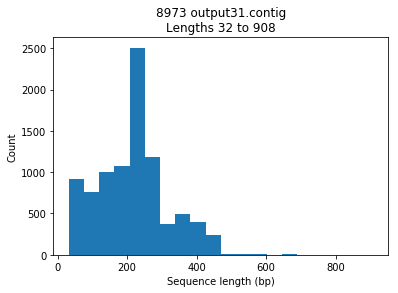

In [21]:
pl.hist(sizes['length'], bins=20)
pl.title("%i output31.contig\nLengths %i to %i" \
            % (len(sizes["length"]),min(sizes['length']),max(sizes['length'])))
pl.xlabel("Sequence length (bp)")
pl.ylabel("Count")
#pl.legend().set_visible(False)
pl.show()

### Describa la grafica 

### En caso de que se desee observar los datos de donde salió la gráfica anterior se ejecuta:

In [22]:
sizes1 = sizes['length'].value_counts(normalize=False, sort=False, ascending=False, 
                                  bins=range(0,sizes['length'].max()+100,100), dropna=True)
sizes1

(-0.001, 100.0]    1176
(100.0, 200.0]     2348
(200.0, 300.0]     3930
(300.0, 400.0]     1034
(400.0, 500.0]      464
(500.0, 600.0]       11
(600.0, 700.0]        7
(700.0, 800.0]        2
(800.0, 900.0]        0
(900.0, 1000.0]       1
Name: length, dtype: int64

In [31]:
f = open('output31.contig', 'r')
secuencias=[]
for rec in SeqIO.parse(f, "fasta"):
    if len(rec.seq)>=900:
        print(rec.id, rec.description, rec.seq[:20])
        secuencias.append(rec)

17943 17943 length 908 cvg_1.8_tip_1 AATTGTGTCCACTGATGGGA


In [32]:
secuencias

[SeqRecord(seq=Seq('AATTGTGTCCACTGATGGGAGTTTAGACTTGATAATGTTTTCAGCAGTTTTCAC...TGG', SingleLetterAlphabet()), id='17943', name='17943', description='17943 length 908 cvg_1.8_tip_1', dbxrefs=[])]

### De manera similar, para obtener el histograma de la distribución de los datos del contenido de GC  se ejecuta el siguiente comando.

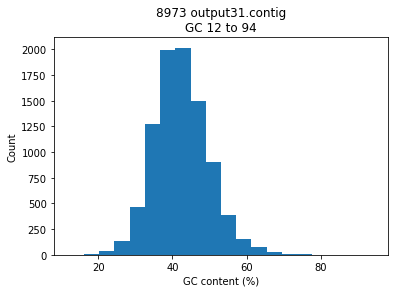

In [26]:
pl.hist(sizes['GC'], bins=20)
pl.title("%i output31.contig\nGC %i to %i" \
            % (len(sizes["GC"]),min(sizes['GC']),max(sizes['GC'])))
pl.xlabel("GC content (%)")
pl.ylabel("Count")
#pl.legend().set_visible(False)
pl.show()

In [27]:
sizesgc = sizes['GC'].value_counts(normalize=False, sort=False, ascending=False, 
                                  bins=range(0,int(sizes['GC'].max()+10),10), dropna=True)
sizesgc

(-0.001, 10.0]       0
(10.0, 20.0]         7
(20.0, 30.0]       277
(30.0, 40.0]      3230
(40.0, 50.0]      4262
(50.0, 60.0]      1050
(60.0, 70.0]       130
(70.0, 80.0]        16
(80.0, 90.0]         0
(90.0, 100.0]        1
Name: GC, dtype: int64

### En el caso de CpG,  se ejecuta el siguiente comando.

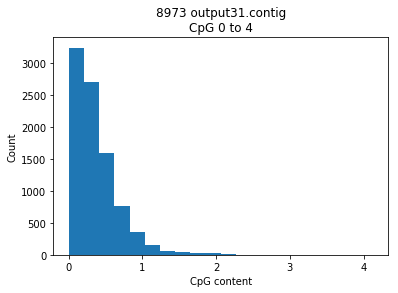

In [28]:
pl.hist(sizes['CpG'], bins=20)
pl.title("%i output31.contig\nCpG %i to %i" \
            % (len(sizes["CpG"]),min(sizes['CpG']),max(sizes['CpG'])))
pl.xlabel("CpG content")
pl.ylabel("Count")
#pl.legend().set_visible(False)
pl.show()

In [29]:
sizesgc = sizes['CpG'].value_counts(normalize=False, sort=False, ascending=False, 
                                  bins=range(0,int(sizes['CpG'].max()+1),1), dropna=True)
sizesgc

(-0.001, 1.0]    8591
(1.0, 2.0]        346
(2.0, 3.0]         33
(3.0, 4.0]          2
Name: CpG, dtype: int64

# Describa de qué le puede ser de utilidad esta información